# **STORE BIKE LRFM ANALYSIS**
---
- Kelompok 3 :
    + Alfidhiya Amany R.
    + Derielle Aisyah A.
    + Hasson Josia
- JCDS 2602 - BSD

## **🔍 Latar Belakang**

Portofolio ini menggunakan data transaksi suatu toko sepeda yang melakukan penjualan secara *online* dan *offline*. Tujuan dari pembuatan portofolio ini adalah untuk melakukan analisis mengenai segmentasi konsumen pada dataset toko sepeda tersebut dan memberikan rekomendasi berdasarkan segmentasi konsumen yang telah dibuat. Model analisis yang digunakan pada portofolio ini adalah LRFM Analysis.

LRFM Analysis atau analisis LRFM (*Length*, *Recency*, *Frequency*, dan *Monetary*) merupakan salah satu model analisis yang digunakan untuk segmentasi konsumen. Analisis LRFM berkembang dari model analisis RFM dengan penambahan satu komponen baru yaitu *Length* yang mengacu pada durasi atau panjang waktu hubungan antara konsumen dan perusahaan. Bagian *Recency* mengacu pada seberapa baru atau terkininya suatu transaksi yang dilakukan konsumen dimana semakin kecil nilainya maka semakin baru transaksi tersebut, yang menunjukkan bahwa pelanggan masih aktif. Bagian *Frequentcy* mengacu pada jumlah transaksi yang telah dilakukan oleh konsumen pada periode waktu tertentu sedangkan bagian *Monetary* mengacu pada total nilai atau jumlah uang yang dihabiskan oleh pelanggan selama periode waktu tertentu. Semakin tinggi nilainya, semakin berharga pelanggan tersebut bagi perusahaan.

Toko sepeda dalam menghadapi persaingan bisnis yang ketat perlu memahami karakteristik dan perilaku pelanggannya secara lebih mendalam. Toko sepeda sudah memiliki data transaksi yang mencakup cukup informasi yang dapat digunakan untuk melakukan analisis LRFM. Analisis ini dapat membantu toko sepeda melakukan segmentasi konsumen untuk mengelompokkan konsumen yang memiliki sifat yang sama. Pengelompokkan konsumen dapat membantu toko sepeda menentukan perlakuan bisnis sesuai dengan masing-masing kelompok. 




## **❔ Rumusan Masalah**

Salah satu langkah strategis yang dapat dilakuka untuk memahami karakteristik dan perilaku pelanggan adalah dengan melakukan segementasi konsumen yaitu mengelompokkan pelanggan berdasarkan kesamaan tertentu seperti preferensi, kebiasaan berbelanja ataupun demografi. Tanpa segmentasi yang tepat, toko sepeda berisiko untuk mengambil keputusan bisnis yang kurang efektif. Oleh karena itu, pertanyaan yang perlu dijawab dalam analisis ini adalah:

**1.  Bagaimana cara mengelompokkan konsumen sehingga kita dapat membagi konsumen berdasarkan perilaku belanja mereka?**

**2. Keputusan bisnis seperti apa yang sesuai dengan setiap segmen konsumen yang telah dibuat?** 

Perumusan segmentasi konsumen perlu dilakukan secara optimal sehingga keputusan bisnis dapat disesuaikan dengan karakteristik masing-masing segmen konsumen.


## **🧠 Data Understanding**

- transaction_id: ID unik untuk setiap transaksi.
- product_id: ID unik untuk setiap produk yang dibeli.
- customer_id: ID unik untuk setiap pelanggan yang melakukan transaksi.
- transaction_date: Tanggal terjadinya transaksi.
- online_order: Menunjukkan apakah transaksi dilakukan secara online/offline.
    + TRUE = Online
    + FALSE = Offline
- order_status: Status pesanan (misalnya, "Approved").
- brand: Merek produk (misalnya, "Solex", "Trek Bicycles").
- product_line: Jenis produk (misalnya, "Standard").
- product_class: Kelas produk (misalnya, "medium").
- product_size: Ukuran produk (misalnya, "medium", "large").
- list_price: Harga daftar produk.
- standard_cost: Biaya standar produk.
- product_first_sold_date: Tanggal pertama produk dijual.

## **📝LRFM Analysis in Python**

### 1. Import Library

In [2]:
# data manipulation
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

# Datetime Library
import datetime

### 2. Extract Dataset

In [3]:
df_raw = pd.read_csv(
    'store_bike.csv', 
    parse_dates=['transaction_date'],        
    dtype={'customer_id':str, 'transaction_id':str}
)

In [4]:
df_raw.sample(10, random_state=42)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
10650,10651,17,2629,2017-02-17,False,Approved,WeareA2B,Touring,medium,large,1362.99,$57.74,34079.0
2041,2042,18,1735,2017-07-22,True,Approved,Solex,Standard,medium,medium,575.27,$431.45,41345.0
8668,8669,4,1827,2017-11-22,True,Approved,Giant Bicycles,Standard,high,medium,1129.13,$677.48,38573.0
1114,1115,23,2759,2017-03-27,False,Approved,Norco Bicycles,Mountain,low,small,688.63,$612.88,34244.0
13902,13903,13,2664,2017-01-14,False,Approved,Solex,Standard,medium,medium,1163.89,$589.27,42560.0
11963,11964,57,3298,2017-06-01,False,Approved,WeareA2B,Touring,medium,large,1890.39,$260.14,36146.0
11072,11073,49,633,2017-04-16,True,Approved,Solex,Standard,medium,large,1061.56,$733.58,34170.0
3002,3003,87,200,2017-02-15,True,Approved,Giant Bicycles,Standard,high,medium,1179.00,$707.40,38482.0
19771,19772,6,3472,2017-02-09,True,Approved,OHM Cycles,Standard,high,medium,227.88,$136.73,38258.0
8115,8116,15,3383,2017-07-03,NaN,Approved,Norco Bicycles,Standard,low,medium,958.74,$748.90,40303.0


In [5]:
df_wrangle = df_raw.copy()

In [6]:
len(df_wrangle[df_wrangle['order_status']== 'Cancelled'])

179

In [7]:
df_wrangle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  object        
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  object        
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  object        
 12  product_first_sold_date  19803 n

👉 Pada dataset, terdapat 179 data transaksi yang mememiliki order status 'Cancelled' atau transaksi batal. Sehingga, data tersebut tidak bisa digunakan dalam analisis LRFM.

In [8]:
df_wrangle.dropna(subset=['online_order'], inplace=True)

In [9]:
len(df_wrangle)

19640

👉 Pada dataset, terdapat data transaksi yang tidak memiliki data atau kosong di kolom online_order dimana kolom tersebut mengacu apakah transaksi tersebut dilakukan secara *online* atau *offline*. Data yang kosong ini tidak memberikan informasi tersebut dan tidak akan mempengaruhi analisis LRFM secara signifikan, oleh karena itu data yang kosong tersebut dihapus.

In [10]:
df_wrangle = df_wrangle[df_wrangle['order_status'] != 'Cancelled']

In [11]:
len(df_wrangle)

19467

👉 Pada dataset, terdapat 179 data transaksi yang mememiliki order status 'Cancelled' atau transaksi batal. Sehingga, data tersebut tidak bisa digunakan dalam analisis LRFM. Oleh karena itu, data tersebut tidak diikut sertakan dalam dataset yang digunakan untuk analisis LRFM.

In [12]:
df_wrangle.duplicated().sum()

0

👉 Pada dataset, tidak terdapat data transaksi yang terduplikat. Sehingga tidak diperlukan perlakukan penghapusan duplikat data.


In [13]:
df_wrangle['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [14]:
analysis_date = df_wrangle['transaction_date'].max() + datetime.timedelta(1) 
analysis_date

Timestamp('2017-12-31 00:00:00')

👉 Pada dataset, waktu transaksi paling akhir yang terdapat di dalam dataset adalah pada "2017-12-30 00:00:00" sedangkan waktu analisisnya adalah satu hari setelah waktu transaksi paling akhir yang terdapat di dalam daa set yaitu pada "2017-12-31 00:00:00".

In [14]:
df_wrangle.to_csv('store_bike_clean.csv')

In [15]:
df_wrangle.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0


👉 Dataset sudah melalui preprocessing yaitu tahapan extracting dan cleaning. Data yang sudah bersih di export dalam bentuk csv dengan nama file "store_bike_clean.csv".

In [16]:
# Online Order Dataset
df_online = df_wrangle[df_wrangle['online_order'] == True]

In [17]:
# Offline Order Dataset
df_offline = df_wrangle[df_wrangle['online_order'] == False]

In [19]:
df_offline.to_csv('Offline Complete.csv')
df_online.to_csv('Online Complete.csv')

👉 Dataset yang sudah bersih dapat dibagi menjadi dataset transaksi online dan offline. Dataset transaksi online diexport dalam bentuk csv dengan nama "Online Complete.csv" sedangkan dataset transaksi offline diexport dalam bentuk csv dengan nama "Offline Complete.csv"

### **3. Calculate LRFM Value**

#### **a. Online Order**

In [18]:
df_customer_online = df_online.groupby('customer_id').agg(
    length=('transaction_date', lambda x: (analysis_date - x.min()).days),
    recency=('transaction_date', lambda x: (analysis_date - x.max()).days),
    frequency=('transaction_id', lambda x: x.nunique()),    
    monetary=('list_price', 'sum')
)
df_customer_online.sample(5, random_state=42)

,length,recency,frequency,monetary
customer_id,,,,
879,361,361,1,958.74
874,344,47,5,5226.81
811,338,190,2,1156.00
2861,362,74,5,5043.11
3299,251,167,2,657.94


#### **b. Offline Order**

In [19]:
df_customer_offline = df_offline.groupby('customer_id').agg(
    length=('transaction_date', lambda x: (analysis_date - x.min()).days),
    recency=('transaction_date', lambda x: (analysis_date - x.max()).days),
    frequency=('transaction_id', lambda x: x.nunique()),    
    monetary=('list_price', 'sum')
)
df_customer_offline.sample(5, random_state=42)

,length,recency,frequency,monetary
customer_id,,,,
1048,256,173,4,2659.75
1657,196,67,2,2562.64
2204,132,18,3,3150.32
3036,329,170,3,5151.16
1191,339,44,4,3282.12


👉 Berikut penjelasan dari masing-masing variabel diatas untuk tabel online maupun offline:

| Variable | Description |
| --- | --- |
| customer_id| ID customer|
| length | Usia customer, diperoleh dari selisih hari pertama bertransaksi dengan hari analisis |
| recency | Selisih hari terakhir bertransaksi dengan hari analisis |
| frequency | Jumlah transaksi yang dilakukan oleh customer |
| monetary | Besar pengeluaran yang dilakukan oleh customer |

### **4. Assigning Scores**

Selanjutnya adalah menentukan skor dengan metode statistical approach

#### **a. Length Online Order**

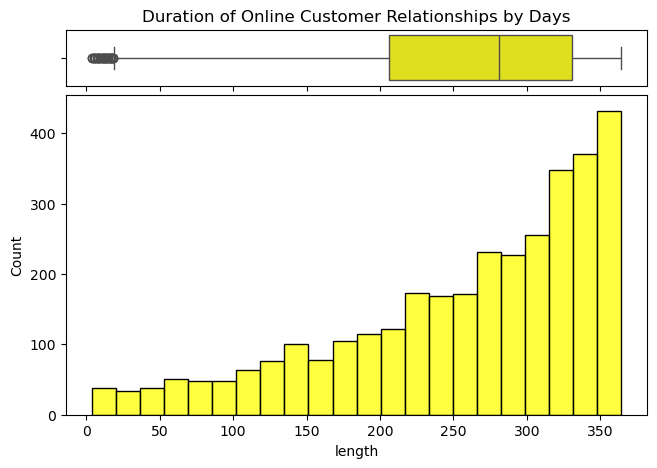

0.00      4.0
0.25    206.0
0.50    281.0
0.75    331.0
1.00    364.0
Name: length, dtype: float64

In [20]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_online, x='length', ax=ax_top, color= 'Yellow')
sns.histplot(data=df_customer_online, x='length', ax=ax_bot, color= 'Yellow')

ax_top.set(
    title='Duration of Online Customer Relationships by Days'
)

plt.show()
display(df_customer_online['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan pada panjang periode penarikan data yakni sejak 1 Januari 2017 - 30 Desember 2017 (363 hari).
- 4 : telah bergabung lebih dari 331 hari.
- 3 : telah bergabung antara 281 hari sampai 331 hari.
- 2 : telah bergabung antara 206 hari sampai 281 hari.
- 1 : baru bergabung antara 4 hari sampai 206 hari.

In [21]:
df_customer_online['L_score'] = pd.qcut(
    df_customer_online['length'],              
    q=4,                                
    labels=[1, 2, 3, 4]                
).astype(int)

#### **b. Length Offline Order**

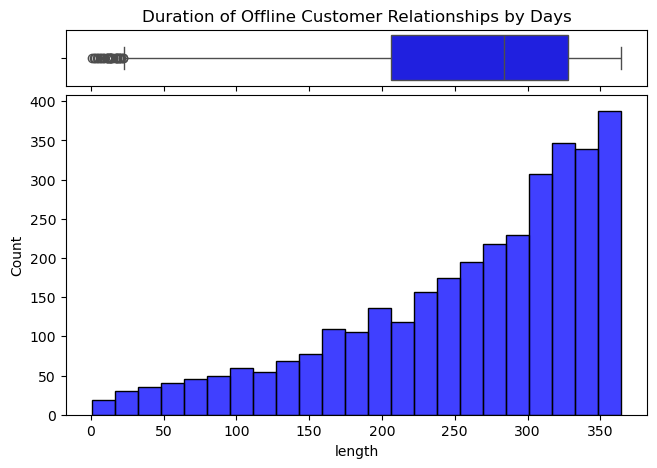

0.00      1.0
0.25    206.0
0.50    284.0
0.75    328.0
1.00    364.0
Name: length, dtype: float64

In [22]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_offline, x='length', ax=ax_top, color= 'Blue')
sns.histplot(data=df_customer_offline, x='length', ax=ax_bot, color= 'Blue')

ax_top.set(
    title='Duration of Offline Customer Relationships by Days'
)

plt.show()
display(df_customer_offline['length'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan pada panjang periode penarikan data yakni sejak 1 Januari 2017 - 30 Desember 2017 (363 hari).
- 4 : telah bergabung lebih dari 328 hari.
- 3 : telah bergabung antara 284 hari sampai 328 hari.
- 2 : telah bergabung antara 206 hari sampai 284 hari.
- 1 : baru bergabung antara 1 hari sampai 206 hari.

In [23]:
df_customer_offline['L_score'] = pd.qcut(
    df_customer_offline['length'],              
    q=4,                                
    labels=[1, 2, 3, 4]                
).astype(int)

#### **c. Recency Online Order**

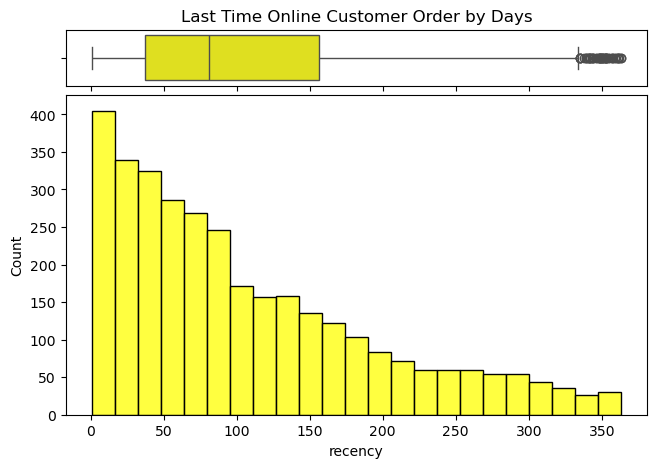

0.00      1.0
0.25     37.0
0.50     81.0
0.75    156.0
1.00    363.0
Name: recency, dtype: float64

In [24]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_online, x='recency', ax=ax_top, color= 'Yellow')
sns.histplot(data=df_customer_online, x='recency', ax=ax_bot, color= 'Yellow')

ax_top.set(
    title='Last Time Online Customer Order by Days'
)

plt.show()
display(df_customer_online['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan pada terakhir kali konsumen melakukan transaksi.
- 4 : melakukan transaksi kurang dari 37 hari terakhir
- 3 : melakukan transaksi antara 37 hingga 81 hari terakhir
- 2 : melakukan transaksi antara 81 hingga 156 hari terakhir
- 1 : melakukan transaksi lebih dari 159 hari terakhir

In [25]:
df_customer_online['R_score'] = pd.qcut(
    df_customer_online['recency'],             
    q=4,                                
    labels=[4, 3, 2, 1]                 
).astype(int)

#### **d. Recency Offline Order**

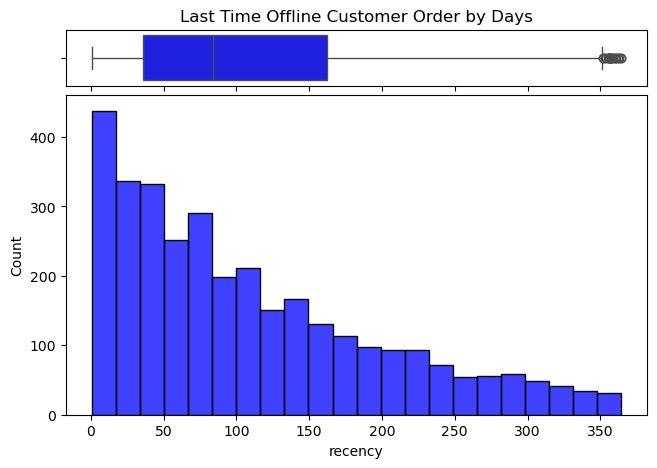

0.00      1.0
0.25     36.0
0.50     84.0
0.75    162.0
1.00    364.0
Name: recency, dtype: float64

In [26]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_offline, x='recency', ax=ax_top, color= 'Blue')
sns.histplot(data=df_customer_offline, x='recency', ax=ax_bot, color= 'Blue')

ax_top.set(
    title='Last Time Offline Customer Order by Days'
)

plt.show()
display(df_customer_offline['recency'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan pada terakhir kali konsumen melakukan transaksi.
- 4 : melakukan transaksi kurang dari 36 hari terakhir
- 3 : melakukan transaksi antara 36 hingga 84 hari terakhir
- 2 : melakukan transaksi antara 84 hingga 162 hari terakhir
- 1 : melakukan transaksi lebih dari 162 hari terakhir

In [27]:
df_customer_offline['R_score'] = pd.qcut(
    df_customer_offline['recency'],             
    q=4,                                
    labels=[4, 3, 2, 1]                 
).astype(int)

#### **e. Frequency Online Order**

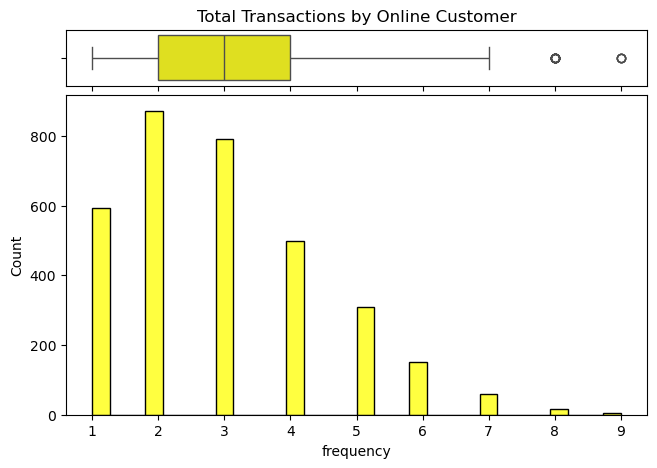

0.00    1.0
0.25    2.0
0.50    3.0
0.75    4.0
1.00    9.0
Name: frequency, dtype: float64

In [28]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_online, x='frequency', ax=ax_top, color= 'Yellow')
sns.histplot(data=df_customer_online, x='frequency', ax=ax_bot, color= 'Yellow')

ax_top.set(
    title='Total Transactions by Online Customer'
)

plt.show()
display(df_customer_online['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan jumlah transaksi yang dilakukan oleh konsumen
- 4 : melakukan transaksi lebih dari 4 kali
- 3 : melakukan transaksi 3 sampai 4 kali 
- 2 : melakukan transaksi 2 sampai 3 kali
- 1 : melakukan transaksi kurang dari 2 kali

In [29]:
df_customer_online['F_score'] = pd.qcut(
    df_customer_online['frequency'],             
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

#### **f. Frequency Offline Order**

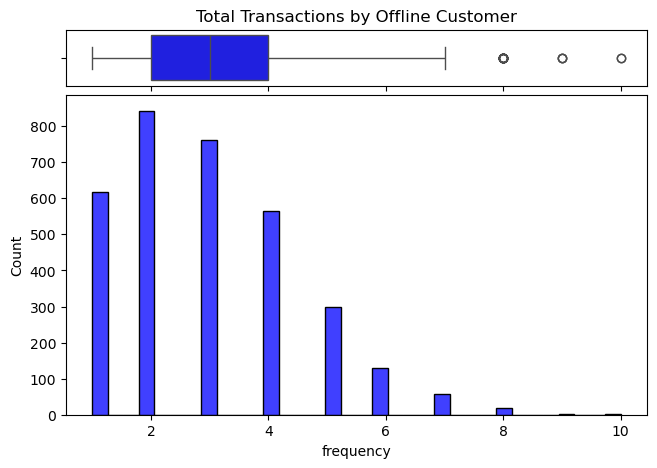

0.00     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    10.0
Name: frequency, dtype: float64

In [30]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_offline, x='frequency', ax=ax_top, color= 'Blue')
sns.histplot(data=df_customer_offline, x='frequency', ax=ax_bot, color= 'Blue')

ax_top.set(
    title='Total Transactions by Offline Customer'
)

plt.show()
display(df_customer_offline['frequency'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan jumlah transaksi yang dilakukan oleh konsumen
- 4 : melakukan transaksi lebih dari 4 kali
- 3 : melakukan transaksi 3 sampai 4 kali 
- 2 : melakukan transaksi 2 sampai 3 kali
- 1 : melakukan transaksi kurang dari 2 kali

In [31]:
df_customer_offline['F_score'] = pd.qcut(
    df_customer_offline['frequency'],             
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

#### **g. Monetary Online Order**

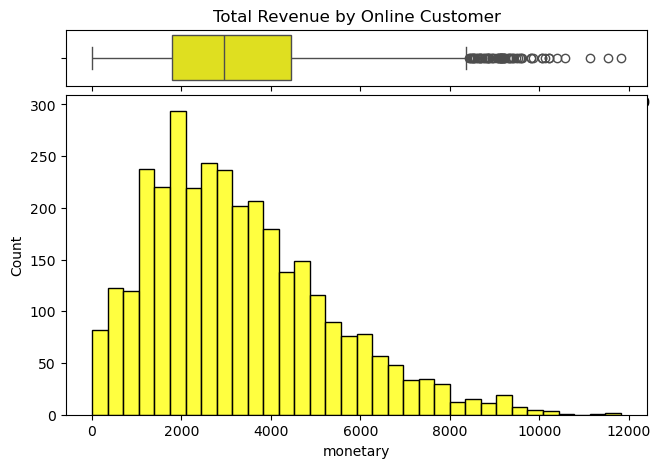

0.00       12.01
0.25     1790.97
0.50     2947.04
0.75     4442.44
1.00    11816.32
Name: monetary, dtype: float64

In [33]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_online, x='monetary', ax=ax_top, color= 'Yellow')
sns.histplot(data=df_customer_online, x='monetary', ax=ax_bot, color= 'Yellow')

ax_top.set(
    title='Total Revenue by Online Customer'
)

plt.show()
display(df_customer_online['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan jumlah total transaksi setiap konsumen.
- 4 : melakukan transaksi lebih dari 4442.44 dollar
- 3 : melakukan transaksi antara 2947.04 hingga 4442.44 dollar
- 2 : melakukan transaksi antara 1790.97 hingga 2947.97 dollar
- 1 : melakukan transaksi kurang dari dari 1790.97 dollar

In [34]:
df_customer_online['M_score'] = pd.qcut(
    df_customer_online['monetary'],             
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

#### **h. Monetary Offline Order**

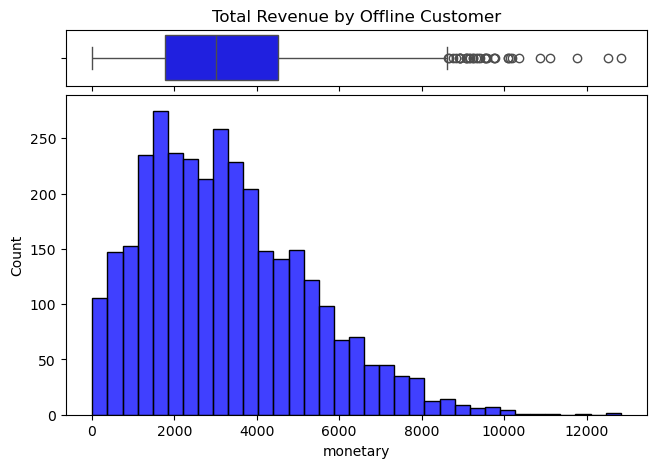

0.00       12.0100
0.25     1765.3000
0.50     3011.7100
0.75     4511.5975
1.00    12829.5100
Name: monetary, dtype: float64

In [35]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2, 
                            ncols=1, 
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=df_customer_offline, x='monetary', ax=ax_top, color= 'Blue')
sns.histplot(data=df_customer_offline, x='monetary', ax=ax_bot, color= 'Blue')

ax_top.set(
    title='Total Revenue by Offline Customer'
)

plt.show()
display(df_customer_offline['monetary'].quantile([0, 0.25, 0.5, 0.75, 1]))

👉 Menggunakan distribusi diatas yang disusun berdasarkan jumlah total transaksi setiap konsumen.
- 4 : melakukan transaksi lebih dari 4511.90 dollar
- 3 : melakukan transaksi antara 3011.71 hingga 4511.90 dollar
- 2 : melakukan transaksi antara 1765.30 hingga 3011.71 dollar
- 1 : melakukan transaksi kurang dari dari 1765.30 dollar

In [36]:
df_customer_offline['M_score'] = pd.qcut(
    df_customer_offline['monetary'],             
    q=4,                                
    labels=[1, 2, 3, 4]                 
).astype(int)

In [37]:
df_customer_online.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score
customer_id,,,,,,,,
879,361,361,1,958.74,4,1,1,1
874,344,47,5,5226.81,4,3,4,4
811,338,190,2,1156.00,4,1,1,1
2861,362,74,5,5043.11,4,3,4,4
3299,251,167,2,657.94,2,1,1,1


In [38]:
df_customer_offline.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score
customer_id,,,,,,,,
1048,256,173,4,2659.75,2,1,3,2
1657,196,67,2,2562.64,1,3,1,2
2204,132,18,3,3150.32,1,4,2,3
3036,329,170,3,5151.16,4,1,2,4
1191,339,44,4,3282.12,4,3,3,3


👉 Dataset sudah ditambah dengan kolom scoring dari tiap komponen LRFM. 

### **5. Labelling Segment**

Selanjutnya dilakukan customer segmentation dengan menggunakan metode Combining Individual Scores Approach. Metode ini menggabungkan skor individual dari keempat dimensi (L,R,F,M) sehingga didapatkan kombinasi unik seperti 2132, 3444, 4311, dan sebagainya. Metode ini memungkinkan idetifikasi beragam perilaku konsumen, tidak hanya dari satu dimensi saja sehingga lebih representatif dan mudah digunakan untuk membuat strategi pemasaran. Berikut merupakan segmentasi konsumen yang dibuat untuk transaksi online maupun offline:

| Length | Recency | Frequency | Monetary | Segmentation Label | Description |
|---|---|---|---|---|---|
|3-4|3-4|3-4|3-4| Top Tier Loyalist| Best Customer |
|3-4|1-2|1-2|1-2| Inactive Customer| Sudah lama tidak berbelanja, jarang berbelanja, dan memiliki nilai transaksi yang rendah |
|3-4|3-4|1-2|1-4| Occasional Spender| Baru-baru ini berbelanja dan memiliki frekuensi belanja yang baik namun nilai transaksinya rendah |
|3-4|3-4|3-4|1-2| Price Conscious Buyers| Sering berbelanja dan baru-baru ini berbelanja tetapi cenderung membeli prodduk dengan harga yang rendah |
|3-4|1-2|3-4|1-4| At Risk Customer| Dulunya sering berbelanja tetapi sudah lama tidak aktif |
|3-4|1-2|1-2|3-4| Reactivated Spender| Sebelumnya tidak aktif tetapi baru-baru ini kembali berbelanja dengan nilai transaksi yang signifikan |
|1-2|1-4|3-4|3-4| New Customer High Value| Customer baru yang memiliki nilai transaksi yang tinggi |
|1-2|1-4|1-2|1-2| New Customer Low Value| Customer baru yang memiliki nilai transaksi rendah |
|1-2|1-2|1-2|3-4| New Customer High Potential| Customer baru dengan potensi untuk menjadi pelanggan bernilai tinggi|
|1-2|3-4|1-2|3-4| New Customer High Spender| Customer baru yang cenderung membeli produk dengan harga tinggi |
|1-2|1-2|3-4|1-2| New Customer Budget Spender| Customer baru yang cenderung membeli produk dengan harga terjangkau |
|1-2|1-2|1-2|1-2| Lost Cause| Customer dengan skor rendah di semua metrik LRFM atau tidak memiliki nilai yang signifikan |

#### **a. Online Order**

In [39]:
df_customer_online['LRFM_score_combined'] = df_customer_online['L_score'].astype(str) + df_customer_online['R_score'].astype(str) + df_customer_online['F_score'].astype(str) + df_customer_online['M_score'].astype(str)
df_customer_online.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,LRFM_score_combined
customer_id,,,,,,,,,
879,361,361,1,958.74,4,1,1,1,4111
874,344,47,5,5226.81,4,3,4,4,4344
811,338,190,2,1156.00,4,1,1,1,4111
2861,362,74,5,5043.11,4,3,4,4,4344
3299,251,167,2,657.94,2,1,1,1,2111


In [40]:
seg_map = {
        r'[3-4][3-4][3-4][3-4]': 'Top Tier Loyalist',
        r'[3-4][1-2][1-2][1-2]': 'Inactive Customer',
        r'[3-4][3-4][1-2][1-4]': 'Occasional Spender',
        r'[3-4][3-4][3-4][1-2]': 'Price Conscious Buyers',
        r'[3-4][1-2][3-4][1-4]': 'At Risk Customer',
        r'[3-4][1-2][1-2][3-4]': 'Reactivated Spender',
        r'[1-2][1-4][3-4][3-4]': 'New Customer High Value',
        r'[1-2][1-4][1-2][1-2]': 'New Customer Low Value',
        r'[1-2][1-2][1-2][3-4]': 'New Customer High Potential',
        r'[1-2][3-4][1-2][3-4]': 'New Customer High Spender',
        r'[1-2][1-2][3-4][1-2]': 'New Customer Budget Spender',
        r'[1-2][1-2][1-2][1-2]': 'Lost Cause'
}
    
df_customer_online['LRFM_segment_combined'] = df_customer_online['LRFM_score_combined'].replace(seg_map, regex=True)
df_customer_online.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,LRFM_score_combined,LRFM_segment_combined
customer_id,,,,,,,,,,
879,361,361,1,958.74,4,1,1,1,4111,Inactive Customer
874,344,47,5,5226.81,4,3,4,4,4344,Top Tier Loyalist
811,338,190,2,1156.00,4,1,1,1,4111,Inactive Customer
2861,362,74,5,5043.11,4,3,4,4,4344,Top Tier Loyalist
3299,251,167,2,657.94,2,1,1,1,2111,New Customer Low Value


#### **b. Offline Order**

In [41]:
df_customer_offline['LRFM_score_combined'] = df_customer_offline['L_score'].astype(str) + df_customer_offline['R_score'].astype(str) + df_customer_offline['F_score'].astype(str) + df_customer_offline['M_score'].astype(str)
df_customer_offline.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,LRFM_score_combined
customer_id,,,,,,,,,
1048,256,173,4,2659.75,2,1,3,2,2132
1657,196,67,2,2562.64,1,3,1,2,1312
2204,132,18,3,3150.32,1,4,2,3,1423
3036,329,170,3,5151.16,4,1,2,4,4124
1191,339,44,4,3282.12,4,3,3,3,4333


In [42]:
seg_map = {
        r'[3-4][3-4][3-4][3-4]': 'Top Tier Loyalist',
        r'[3-4][1-2][1-2][1-2]': 'Inactive Customer',
        r'[3-4][3-4][1-2][1-4]': 'Occasional Spender',
        r'[3-4][3-4][3-4][1-2]': 'Price Conscious Buyers',
        r'[3-4][1-2][3-4][1-4]': 'At Risk Customer',
        r'[3-4][1-2][1-2][3-4]': 'Reactivated Spender',
        r'[1-2][1-4][3-4][3-4]': 'New Customer High Value',
        r'[1-2][1-4][1-2][1-2]': 'New Customer Low Value',
        r'[1-2][1-2][1-2][3-4]': 'New Customer High Potential',
        r'[1-2][3-4][1-2][3-4]': 'New Customer High Spender',
        r'[1-2][1-2][3-4][1-2]': 'New Customer Budget Spender',
        r'[1-2][1-2][1-2][1-2]': 'Lost Cause'
}
    
df_customer_offline['LRFM_segment_combined'] = df_customer_offline['LRFM_score_combined'].replace(seg_map, regex=True)
df_customer_offline.sample(5, random_state=42)

,length,recency,frequency,monetary,L_score,R_score,F_score,M_score,LRFM_score_combined,LRFM_segment_combined
customer_id,,,,,,,,,,
1048,256,173,4,2659.75,2,1,3,2,2132,New Customer Budget Spender
1657,196,67,2,2562.64,1,3,1,2,1312,New Customer Low Value
2204,132,18,3,3150.32,1,4,2,3,1423,New Customer High Spender
3036,329,170,3,5151.16,4,1,2,4,4124,Reactivated Spender
1191,339,44,4,3282.12,4,3,3,3,4333,Top Tier Loyalist


In [45]:
df_customer_offline.to_csv('Offline Store Bike.csv')
df_customer_online.to_csv('Online Store Bike.csv')

## **📕 Kesimpulan dan Rekomendasi**

Dari analisis LRFM yang telah dilakukan, konsumen dari toko sepeda dapat dikelompok menjadi 12 segmen yang berbeda. Perlakuan stratgi bisnis yang sesuai dapat diterapkan ke setiap segmen tersebut. Berikut rekomendasi bisnis yang dapat dilakukan untuk 10 segmen yang telah dibuat:

1. **Top Tier Loyalist**
    
    Deskripsi : *Best Customer* 
    - Online:
        + Akses eksklusif ke produk baru, diskon pribadi, dan program loyalitas premium
        + Undangan ke webinar eksklusif atau sesi tanya jawab dengan ahli  sepeda
        + Layanan pelanggan prioritas melalui chat atau telepon 
    - Offline:
        + Layanan penggunaan toko dengan konsultasi khusus dan fasilitas tambahan seperti snack dan merchandise
        + Layanan concierge pribadi untuk membantu konsumen dengan semua kebutuhan
    
2. **Inactive Customer**
    
    Deskripsi : *Sudah lama tidak berbelanja, jarang berbelanja, dan memiliki nilai transaksi yang rendah* 
    - Online:
        + Email dengan penawaran eksklusif (diskon khusus, free shipping) untuk menarik mereka kembali berbelanja.
        + Personalisasi konten berdasarkan riwayat pembelian sebelumnya.
        + Penggunaan iklan retargeting di media sosial untuk mengingatkan mereka tentang mengenai toko sepeda    
    - Offline:
        + Kupon diskon yang dapat digunakan di toko.
        + Layanan telepon untuk menanyakan kebutuhan pelanggan, penawaran bantuan dan marketing promosi terbaru

3. **Occasional Spender**
    
    Deskripsi : *Baru-baru ini berbelanja dan memiliki frekuensi belanja yang baik namun nilai transaksinya rendah* 
    - Online:
        + Penawaran bundling produk dengan harga diskon atau promosi upselling untuk meningkatkan nilai transaksi
        + Personalisasi konten berdasarkan riwayat pembelian sebelumnya atau produk populer di kalangan pelanggan serupa
    - Offline:
        + Kupon diskon khusus untuk pembelian dalam jumlah tertentu
        + Promosi upselling produk yang mungkin menarik untuk konsumen

4. **Price Concious Buyers**
    
    Deskripsi : *Sering berbelanja dan baru-baru ini berbelanja tetapi cenderung membeli prodduk dengan harga yang rendah* 
    - Online:
        + Penawaran kupon diskon atau kode promo untuk pembelian berikutnya
        + Promosi produk dengan harga diskon
        + Personalisasi konten berdasarkan riwayat pembelian sebelumnya atau produk populer di kalangan pelanggan serupa
    - Offline:
        + Acara obral atau diskon khusus di toko. 
        + Promosi program loyalitas dengan adanya tambahan diskon khusus untuk pelanggan yang mengikuti program

5. **At Risk Customer**
    
    Deskripsi : *Dulunya sering berbelanja tetapi sudah lama tidak aktif* 
    - Online:
        + Pengiriman *personalized email* atau notifikasi yang menanyakan mengapa mereka tidak berbelanja lagi dan menawarkan solusi. 
        + Pemberian diskon khusus untuk pembelian berikutnya.
    - Offline:
        + Layanan telepon untuk menanyakan apakah mereka memiliki masalah atau kebutuhan yang dapat dipenuhi.
        + Penawaran layanan perbaikan atau perawatan sepeda gratis

6. **Reactivated Spender**
    
    Deskripsi : *Sebelumnya tidak aktif tetapi baru-baru ini kembali berbelanja dengan nilai transaksi yang signifikan* 
    - Online:
        + Penawaran personalisasi berdasarkan produk yang baru dibeli
        + Penawaran program referral untuk mendapatkan diskon
    - Offline:
        + Penawaran layanan perbaikan atau perawatan sepeda gratis setelah melakukan transaksi
        + Undang mereka ke acara komunitas bersepeda yg diadakan oleh toko

7. **New Customer High Value**
    
    Deskripsi : *Customer baru yang memiliki nilai transaksi yang tinggi* 
    - Online:
        + Personalisasi rekomendasi produk berdasarkan riwayat pembelian pertama mereka
        + Penawaran free shipping atau diskon untuk pembelian berikutnya.
    - Offline:
        + Pelayanan atau servis pelanggan yang sangat baik untuk memastikan mereka puas dengan pembelian mereka.
        + Promosi keanggotaan program loyalitas

8. **New Customer Low Value**
    
    Deskripsi : *Customer baru yang memiliki nilai transaksi rendah* 
    - Online:
        + Penawaran bundling produk dengan harga diskon atau promosi upselling untuk meningkatkan nilai transaksi
        + Personalisasi konten edukatif mengenai produk, konten kreatif seperi tips perawatan sepeda, dan lain-lain
    - Offline:
        + Promo diskon untuk pembelian pertama di toko.
        + Undang mereka ke acara pengenalan produk dan berikan kesempatan untuk mencoba produk

9. **New Customer High Potential**
    
    Deskripsi : *Customer baru dengan potensi untuk menjadi pelanggan bernilai tinggi* 
    - Online:
        + Penawaran produk premium yang memiliki margin keuntungan tinggi 
        + Personalisasi konten edukatif mengenai produk dan produk premium, konten kreatif seperi tips perawatan sepeda, dan lain-lain
    - Offline:
        + Pelayanan atau servis pelanggan yang sangat baik untuk memastikan mereka puas dengan pembelian mereka.
        + Penawaran layanan upgrade produk atau customization

10. **New Customer High Spender**
    
    Deskripsi : *Customer baru yang cenderung membeli produk dengan harga tinggi* 
    - Online:
        + Penawaran eksklusif untuk produk-produk premium
        + Personalisasi konten edukatif mengenai produk dan produk premium, konten kreatif seperi tips perawatan sepeda, dan lain-lain
    - Offline:
        + Pelayanan konsultasi pribadi dengan staf ahli untuk membantu mereka dalam memilih produk yang sesuai
        + Undang mereka ke acara peluncuran produk baru atau eksklusif

11. **New Customer Budget Spender**
    
    Deskripsi : *Customer baru yang cenderung membeli produk dengan harga terjangkau*
    - Online:
        + Penawaran produk dengan hrga yang terjangkau
        + Personalisasi konsten edukatif mengenai produk yang dibeli sebelumnya dan konten kreatif seperti tips perawatan sepeda, dan lain-lain.
    - Offline:
        + Penawaran khusus untuk produk dengan harga diskon 
        + Pelayanan konsultasi pribadi dengan staf ahli untuk membantu mereka dalam memilih produk yang sesuai

12. **Lost Cause**
    
    Deskripsi : *Customer dengan skor rendah di semua metrik LRFM atau tidak memiliki nilai yang signifikan* 
    - Online:
        + Tidak ada tindakan khusus, fokuskan perlakuan pada segmen customer yang lebih potensial
    - Offline:
        + Tidak ada tindakan khusus, fokuskan perlakuan pada segmen customer yang lebih potensial
    


